In [1]:
import matplotlib.pyplot as plt
plt.style.use("nature_neurosci.mplstyle")


# Define colors
colors = {
    "Single": "#333333",
    "Left": "#246EB9",
    "Right": "#8B1E3F",
    "Ipsilateral": "#1B9E77",
    "Contralateral": "#D95F02",
    "Within": "#2B4162",
    "Across": "#E89D0B",
    'SerialBiasWeak': '#254441',
    'SerialBias': '#43AA8B',\
    'ReactivationWeak': '#7A8A99',
    'Reactivation': '#12719E'
}

from matplotlib.colors import LinearSegmentedColormap
left_right_cmap = LinearSegmentedColormap.from_list("LeftRight",\
                                                     [colors['Left'], "white", colors['Right']])
ipsi_contra_cmap = LinearSegmentedColormap.from_list("IpsiContra",\
                                                     [colors['Ipsilateral'], "white", colors['Contralateral']])
within_cmap = LinearSegmentedColormap.from_list("Within",\
                                                     ["white", colors['Within']])
across_cmap = LinearSegmentedColormap.from_list("Across",\
                                                     ["white", colors['Across']])

In [2]:
## circstats
def len2(x):
	if type(x) is not type([]):
		if type(x) is not type(array([])):
			return -1
	return len(x)

def phase2(x):
	if not np.isnan(x):
		return phase(x)
	return nan
    
def circdist(angles1,angles2):
    ''' calculates circular distance of angles [rad]'''
    if len2(angles2) < 0:
        if len2(angles1) > 0:
            angles2 = [angles2]*len(angles1)
        else:
            angles2 = [angles2]
            angles1 = [angles1]
        if len2(angles1) < 0:
            angles1 = [angles1]*len(angles2)
    return array(list(map(lambda a1,a2: phase2(np.exp(1j*a1)/np.exp(1j*a2)), angles1,angles2)))

In [3]:
def sig_bar(sigs,axis,y,ax,color):
	w=np.diff(axis)[0]
	for s in sigs:
		beg =axis[s]-w/2
		end = axis[s]+w/2
		ax.fill_between([beg,end],[y[0],y[0]],[y[1],y[1]],color=color)

In [4]:
def sign_rl(rel_loc):
    # returns sign of array unless value=0, returns 1
    sign = [np.sign(rel_loc[rl]) if rel_loc[rl]!=0.0 else 1 for rl in range(len(rel_loc))]
    return np.array(sign)

In [5]:
import numpy as np
def plot_twolines_full(R=[],base=[], bins=0.2,labelR='',labelB='', errorbars='SEM', MeanType = np.nanmean,\
                                 borders=[], ylabel='decoding', yticks = False, titel='', significances=False,\
                       currentTrial=False, end_border = 15, shorten_delay = 0,\
                       refline =0, colors=[colors['Within'], colors['Across']]):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]-shorten_delay)-\
         (borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-\
          (borders[7]-borders[1])-offset_start)*bins
    if end_border < 8:# need end of one trial, start of next trial
        x3 = (np.linspace(borders[5]+shorten_delay, borders[end_border], borders[end_border]-borders[5]-shorten_delay)-\
              (borders[7]-borders[1])-offset_start)*bins
    
    width_radius = [len(x), len(x3)]
    # only add 3rd axis if we look at start of next trial
    if end_border > 12:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-\
                    (borders[13]-borders[1])-offset_start)*bins
        start_curr = (np.linspace(borders[12], borders[end_border], borders[end_border]-borders[12])-\
                      (borders[13]-borders[1])-offset_start)*bins
        x5 = np.append(end_prev,start_curr)
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    elif end_border >=10:
        end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-offset_start)*bins
        x5 = end_prev
        width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_rel(R,base, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    
    # compute mean and errorbars
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
    
    #f, (ax1,ax5) = plt.subplots(1, 2,sharey=True,figsize=(3.8,1.6), gridspec_kw={'width_ratios': width_radius})
    #f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(16,5), gridspec_kw={'width_ratios': width_radius})
    if end_border < 10:
        f, (ax1,ax3) = plt.subplots(1, 2,sharey=True,figsize=(3.,2), gridspec_kw={'width_ratios': width_radius})
    else:
        f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(3.5, 2), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]-shorten_delay)
    # within
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]),\
                     color=colors[1], alpha=0.3)
    if currentTrial:
        ax1.set_xlabel('fix$_{n+1}$', labelpad=0)
    else:
        ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    if yticks != False:
        ax1.set_yticks(yticks)
    if (len(np.unique(base)) != 1):
        ax1.legend()
    
    ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    if end_border < 8:
        cut = range(borders[5]+shorten_delay, borders[end_border])
    # within
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.3)
    # across 
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.3)
    if currentTrial:
        ax3.set_xlabel('response$_{n+1}$', labelpad=0)
    else:
        ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
    #ax3.set_ylabel(ylabel)
    #ax3.set_yticks([0,0.1])
       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    if end_border >= 10:
        pc_base = mean_base[borders[9]:borders[10]+1]
        pcstd_base = std_base[borders[9]:borders[10]+1]
        pc_R = mean_R[borders[9]:borders[10]+1]
        pcstd_R = std_R[borders[9]:borders[10]+1]
        if end_border > 12:
            pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
            pcstd_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
            pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
            pcstd_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])    

        # plot reactivaton period
        # within
        ax5.plot(x5,pc_R, color=colors[0])
        ax5.fill_between(x5, pc_R-np.array(pcstd_R), pc_R+np.array(pcstd_R), color=colors[0], alpha=0.3)
        # across
        ax5.plot(x5,pc_base, color=colors[1])
        ax5.fill_between(x5, pc_base-np.array(pcstd_base), pc_base+np.array(pcstd_base), color=colors[1], alpha=0.3)
        # plot baseline
        ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
        #ax5.set_xticks([])
        ax5.spines['right'].set_visible(False)
        ax5.spines['left'].set_visible(False)
        ax5.spines['top'].set_visible(False)
        ax5.xaxis.set_ticks_position('bottom')
        ax5.axhline(refline, color='#333333', linestyle='--', alpha=0.7)
        y0=ax5.get_ylim()[0]
        y1=ax5.get_ylim()[1]
        ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins],\
                         y0, y1, color='grey', alpha=0.2)

    ###################### MARK IMPORTANT TIME PERIODS    
    f.text(0.55, 0.02, 'time (s) from', ha='center', fontsize=8)
#     # # plot significances
    y0=ax3.get_ylim()[0]
    y1=ax3.get_ylim()[1]
    off = (y1-y0)/10
    marker=250
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)

    w = (y1-y0)/50
    off = [y1-w, y1]
    sigs = np.where(pvals[borders[1]:borders[5]-shorten_delay]<compare)[0]
    sig_bar(sigs,x,off,ax1,'#333333')
    sigs = np.where(pvals[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
    sig_bar(sigs,x3,off,ax3,'#333333')
    if end_border >= 10:
        sigs = np.where(pvals[borders[9]:borders[10]+1]<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.23, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.46, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        f.text(0.85, 0.87, 'ITI$_{n}$', ha='center', fontsize=8)
    elif end_border > 12:
        sigs = np.where(np.append(pvals[borders[9]:borders[10]+1],pvals[borders[12]:borders[15]])<compare)[0]
        sig_bar(sigs,x5,off,ax5,'#333333')
        f.text(0.94, 0.87, 'Stim$_{n+1}$', ha='center', fontsize=8)
    else:
        f.text(0.29, 0.87, 'Stim$_{n}$', ha='center', fontsize=8)
        f.text(0.63, 0.87, 'Delay$_{n}$', ha='center', fontsize=8)
        
    if significances:
        # within area
        off = [y1-2.5*w, y1-1.5*w]
        sigs = np.where(pvals1[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[0])
        sigs = np.where(pvals1[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[0])
        if end_border >= 10:
            sigs = np.where(pvals1[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
        elif end_border > 12:
            sigs = np.where(np.append(pvals1[borders[9]:borders[10]+1],pvals1[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[0])
            
        # across areas
        off = [y1-4*w, y1-3*w]
        sigs = np.where(pvals2[borders[1]:borders[5]-shorten_delay]<compare)[0]
        sig_bar(sigs,x,off,ax1,colors[1])
        sigs = np.where(pvals2[borders[5]+shorten_delay:borders[8]+1]<compare)[0]
        sig_bar(sigs,x3,off,ax3,colors[1])
        if end_border >= 10:
            sigs = np.where(pvals2[borders[9]:borders[10]+1]<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        elif end_border > 12:
            sigs = np.where(np.append(pvals2[borders[9]:borders[10]+1],pvals2[borders[12]:borders[15]])<compare)[0]
            sig_bar(sigs,x5,off,ax5,colors[1])
        

    plt.suptitle(titel)

    return

In [6]:
def plot_threelines_full(R=[],base=[],base2=[], bins=200,labelR='',labelB='',labelB2='',\
                         errorbars='SEM', MeanType = np.nanmean, shorten_delay = 0,\
                        borders=[], ylabel='decoding', cutyaxis = False, titel='',\
                         colors=['#333333', colors['Within'], colors['Across']]):
   
    offset_start = borders[1]-borders[0]
    x = (np.linspace(borders[1], borders[5]-shorten_delay, borders[5]-borders[1]+1-shorten_delay)-(borders[2]-borders[1])-offset_start)*bins
    x3 = (np.linspace(borders[5]+shorten_delay, borders[8], borders[8]-borders[5]+1-shorten_delay)-(borders[7]-1-borders[1])-offset_start)*bins
    # need end of one trial, start of next trial
    end_prev = (np.linspace(borders[9], borders[10], borders[10]-borders[9]+1)-(borders[13]-borders[1])-offset_start)*bins
    start_curr = (np.linspace(borders[12], borders[15], borders[15]-borders[12])-(borders[13]-borders[1])-offset_start)*bins
    x5 = np.append(end_prev,start_curr)
    len(x5)
    width_radius = [len(x), len(x3),  len(x5)]# len(x3),
    
    compare = 0.05#/len(np.append(np.append(x,x2),x5))     
    # TTESTS:
    pvals = ttest_rel(R,base, axis=0, nan_policy='omit')[1]
    pvals1 = ttest_1samp(R, 0, axis=0, nan_policy='omit')[1]
    pvals2 = ttest_1samp(base, 0, axis=0, nan_policy='omit')[1]
    
    mean_R = MeanType(R, axis=0)
    mean_base = MeanType(base, axis=0)
    mean_base2 = MeanType(base2, axis=0)
    if MeanType == circmean:
        mean_R = MeanType(R, axis=0, low=-np.pi, high=np.pi)
        mean_base = MeanType(base, axis=0, low=-np.pi, high=np.pi)
        mean_base2 = MeanType(base2, axis=0, low=-np.pi, high=np.pi)
    if errorbars=='CI':
        std_R = 2*sem(R, axis=0, nan_policy='omit')
        std_base = 2*sem(base, axis=0, nan_policy='omit')
        std_base2 = 2*sem(base2, axis=0, nan_policy='omit')
    else:
        std_R = sem(R, axis=0, nan_policy='omit')
        std_base = sem(base, axis=0, nan_policy='omit')
        std_base2 = sem(base2, axis=0, nan_policy='omit')
            
    
    f, (ax1,ax3,ax5) = plt.subplots(1, 3,sharey=True,figsize=(4.8, 2.1), gridspec_kw={'width_ratios': width_radius})
    
    ###################### PLOT FIXTION TO DELAY PREVIOUS
    cut = range(borders[1], borders[5]+1-shorten_delay)
    # within
    ax1.plot(x,mean_base[cut], color=colors[1], label=labelB)#+', '+errorbars
    ax1.fill_between(x, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.2)
    # base2
    ax1.plot(x,mean_base2[cut], color=colors[2], label=labelB2)#+', '+errorbars
    ax1.fill_between(x, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]), color=colors[2], alpha=0.2)
    # across 
    ax1.plot(x,mean_R[cut], color=colors[0], label=labelR)#+', '+errorbars
    ax1.fill_between(x, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.2)
    ax1.set_xlabel('fix$_{n}$', labelpad=0)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')
    ax1.axhline(0, color='#333333', linestyle='--', alpha=0.7)
    ax1.set_ylabel(ylabel)
    ax1.legend()
    
#     ###################### PLOT DELAY TO SACCADE PREVIOUS
    cut = range(borders[5]+shorten_delay, borders[8]+1)
    # within
    ax3.plot(x3,mean_base[cut], color=colors[1], label=labelB)
    ax3.fill_between(x3, mean_base[cut]-np.array(std_base[cut]), mean_base[cut]+np.array(std_base[cut]), color=colors[1], alpha=0.2)
    # base2
    ax3.plot(x3,mean_base2[cut], color=colors[2], label=labelB2)
    ax3.fill_between(x3, mean_base2[cut]-np.array(std_base2[cut]), mean_base2[cut]+np.array(std_base2[cut]), color=colors[2], alpha=0.2)
    # across 
    ax3.plot(x3,mean_R[cut], color=colors[0], label=labelR)
    ax3.fill_between(x3, mean_R[cut]-np.array(std_R[cut]), mean_R[cut]+np.array(std_R[cut]), color=colors[0], alpha=0.2)
    ax3.set_xlabel('response$_{n}$', labelpad=0)
    ax3.spines['right'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax3.xaxis.set_ticks_position('bottom')
    ax3.axhline(0, color='#333333', linestyle='--', alpha=0.7)
       
    ###################### PLOT ITI PREVIOUS TO DELAY CURRENT TRIAL
    pc_base = np.append(mean_base[borders[9]:borders[10]+1],mean_base[borders[12]:borders[15]])
    std_base = np.append(std_base[borders[9]:borders[10]+1],std_base[borders[12]:borders[15]])
    pc_base2 = np.append(mean_base2[borders[9]:borders[10]+1],mean_base2[borders[12]:borders[15]])
    std_base2 = np.append(std_base2[borders[9]:borders[10]+1],std_base2[borders[12]:borders[15]])
    pc_R = np.append(mean_R[borders[9]:borders[10]+1],mean_R[borders[12]:borders[15]])
    std_R = np.append(std_R[borders[9]:borders[10]+1],std_R[borders[12]:borders[15]])
    # plot
    # within
    ax5.plot(x5,pc_base, color=colors[1])
    ax5.fill_between(x5, pc_base-np.array(std_base), pc_base+np.array(std_base), color=colors[1], alpha=0.2)
    # base2
    ax5.plot(x5,pc_base2, color=colors[2])
    ax5.fill_between(x5, pc_base2-np.array(std_base2), pc_base2+np.array(std_base2), color=colors[2], alpha=0.2)
    # across
    ax5.plot(x5,pc_R, color=colors[0])
    ax5.fill_between(x5, pc_R-np.array(std_R), pc_R+np.array(std_R), color=colors[0], alpha=0.2)
    # plot baseline
    ax5.set_xlabel('fix$_{n+1}$', labelpad=0)
    #ax5.set_xticks([])
    ax5.spines['right'].set_visible(False)
    ax5.spines['left'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    ax5.xaxis.set_ticks_position('bottom')
    ax5.axhline(0, color='#333333', linestyle='--', alpha=0.7)
    if cutyaxis != False:
        ax5.set_yticks(cutyaxis)
        ax5.set_ylim(cutyaxis)

    ###################### MARK IMPORTANT TIME PERIODS
    y0=ax5.get_ylim()[0]
    y1=ax5.get_ylim()[1]
    off = (y1-y0)/10
    #marker=30
    marker=250
#     ax1.plot(0, color='midnightblue', alpha=0.5)
    ax1.fill_between([(borders[3]-borders[2])*bins, (borders[4]-borders[2])*bins], y0, y1, color='grey', alpha=0.2)
    ax3.plot(0, color='#A0B2A6', alpha=0.5)
    ax5.plot(0, color='midnightblue', alpha=0.5)
    ax5.fill_between([(borders[14]-borders[12])*bins, (borders[15]-borders[12])*bins], y0, y1, color='grey', alpha=0.2)

    f.text(0.55, -0., 'time (ms) from', ha='center', fontsize=12)
    f.text(0.23, 0.75, 'Stim$_{n}$', ha='center', fontsize=10)
    f.text(0.46, 0.75, 'Delay$_{n}$', ha='center', fontsize=10)
    f.text(0.85, 0.75, 'ITI$_{n}$', ha='center', fontsize=10)
    f.text(0.94, 0.75, 'Stim$_{n+1}$', ha='center', fontsize=10)
    
    plt.suptitle(titel)

    return

# LOAD DATA

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.io import loadmat
from scipy.stats import *
from scipy.optimize import curve_fit
from cmath import phase
from numpy import array
from scipy.sparse import csr_matrix
import urllib
import pickle
from scipy.io import loadmat
import glob
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from pymicro.view.vol_utils import compute_affine_transform
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import statsmodels.formula.api as sf
from sklearn import metrics
from random import randint
from numpy.linalg import inv
import math
import io
#import h5py
from circ_stats import *
from patsy import dmatrices
import statsmodels.api as sm
import helpers as hf
import statsmodels.formula.api as smf
import copy
import matplotlib.ticker as ticker
from pingouin import circ_corrcc


#monkeys = ["Sa", "Pe", "Wa"]
#for m in monkeys:
#    files = np.sort(glob.glob('../Data/new/%s*.mat' %m))
#    for f in files:
#        print(f)

monkeys=['Sa', 'Pe', 'Wa']

with open('./Results/df_serial.pickle', 'rb') as handle:
    df_sb = pickle.load(handle)
df_sb = df_sb.reset_index()
df_sb.rel_loc = np.round(df_sb.rel_loc,3)

    
#df_behav = df_behav.loc[(df_behav.monkey=='Sa') | (df_behav.monkey=='Wa')].reset_index(drop=True)
df_sb['session_continuous'] = [df_sb.monkey[i]+str(df_sb.session[i]) for i in df_sb.index]

same_id = 1
opp_id = 0
border_id = 2

# DEFINE DOG FIT PARAMETERS FOR EACH ANIMAL (based on BIC, questionable for Pe, Wa (delta BIC <2)
sigma={'Sa':0.9, 'Pe':2.15, 'Wa':0.45}
neural_sigma = {'Sa': 1.35, 'Pe': 0.9, 'Wa': 1.75}#
reactivation_sigma={'Sa':2.95, 'Pe':1.15, 'Wa':1.55}

/home/melanie/anaconda3/envs/brian2/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [8]:
def cut_task_timings(timecourse=[], timeperiods=np.array([]), max_time=np.nan):
    """
    Cuts the variable timecourse together based on the varying task timing in multiple sessions.
    Aligns to shortest session timing
    
    timecourse : np.array() of shape (sessions x trials x time)
    timeperiods: np.array() of shape (sessions x time)
    
    cut_array: np.array() of shape (sessions x trials x minimum_time)
    """
        
    # find minimum taskperiod onsets / durations across sessions
    
    min_duration = np.min(np.diff(timeperiods),axis=0)
    min_onset = np.append(0,np.cumsum(min_duration))#add one more 0 at start so borders and diff add up


    # if no end time is given, do for all timesteps
    if np.isnan(max_time):
        max_time = timeperiods.shape[-1]
    
    # cut sessions together
#     cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
#                                         if idx not in [5, 9, 16, 20]\
#                                  else timecourse[sess][timing-min_duration[idx]:timing]
#                                         for idx,timing in enumerate(timeperiods[sess][:max_time])])\
#                                         for sess in range(len(timecourse))])
    cut_array = np.array([np.concatenate([timecourse[sess][timing:timing+min_duration[idx]]\
                                        if idx not in [5, 9, 16, 20]\
                                 else timecourse[sess][timeperiods[sess][idx+1]-min_duration[idx]:timeperiods[sess][idx+1]]
                                        for idx,timing in enumerate(timeperiods[sess][:max_time])])\
                                        for sess in range(len(timecourse))])

    
    #cut_array = np.array([cut_array])
    
    return cut_array, min_onset

----

# Single trial analyses

In [9]:
def abs_err(prediction, all_targets):
    return np.abs([circdist(prediction, targ) for targ in all_targets])


df_behav = df_sb.copy()
#df_behav = df_behav.loc[(df_behav.monkey=='Sa') | (df_behav.monkey=='Wa')].reset_index(drop=True)
df_behav['session_continuous'] = df_behav['monkey']+df_behav['session'].astype(str)
# drop session with shorter stimulus
df_behav.drop(index = np.where(df_behav.session_continuous == 'Pe2')[0], inplace=True)
df_behav.reset_index(drop=True, inplace=True)



# LOAD NEURAL DECODER DATA
# INSTEAD OF RESPONSE ORTHO USE DELAY DECODER
with open('../../Desktop/PhD/2_Smith/Results/SingleTrialDecoding/Serial20times5FoldStratifiedCrossvalDelayDecodingPrevCurr_bins200_zscorednoIntercept_randomShuffleControlprevcurrcorrected_long.pickle', 'rb') as handle:
    df = pickle.load(handle)

df['session_continuous'] = df['monkey']+df['session'].astype(str)

bins=200  

# compute errors and shuffles
for neuron_type in ['combined', 'left', 'right']:
    print('Computing neuron_type: '+neuron_type)
    pred_prev=[]
    pred_prevortho=[]
    pred_curr=[]
    basecorr_prev=[]
    basecorr_prevortho=[]
    basecorr_curr=[]
    for i in df.index:
        targ_prev = np.round(np.angle(df.loc[i, 'targ_prev_xy']),3)
        targ_curr = np.round(np.angle(df.loc[i, 'targ_curr_xy']), 3)
        pprev = np.angle(df.loc[i, 'pred_complex_prev_'+neuron_type])
        # TODO! Change for all that re not delay decoders
        #pprevortho = np.angle(df.loc[i,'pred_complex_prev_ortho_'+neuron_type])
        pprevortho = np.angle(df.loc[i,'pred_complex_delay_'+neuron_type])
        pcurr = np.angle(df.loc[i,'pred_complex_curr_'+neuron_type])

        # compute error of prediction to target
        err_prev = circdist(pprev,targ_prev)
        err_prevortho = circdist(pprevortho,targ_prev)
        err_curr = circdist(pcurr,targ_curr)
        pred_prev.append(err_prev)
        pred_prevortho.append(err_prevortho)
        pred_curr.append(err_curr)

    df['prederror_prev_'+neuron_type] = pred_prev
    df['prederror_ortho_'+neuron_type] = pred_prevortho
    df['prederror_curr_'+neuron_type] = pred_curr
    
# define start/end decoer errors for bumpdrift
for neuron_type in ['combined', 'left', 'right']:
    df[neuron_type+'DecoderErr'] = [df.loc[i,'prederror_prev_'+neuron_type]\
                                  for i in df.index]


df['leftHemi'] = df['hemifield_prev_left']
df['rightHemi'] = df['hemifield_prev_right']

IPSI = 1
BORDER = 0
CONTRA = -1

# drop session with shorter stimulus
df.drop(index = np.where(df.session_continuous == 'Pe2')[0], inplace=True)
df.reset_index(drop=True, inplace=True)

assert list(df.index) == list(df_behav.index), 'For merging dataframes: must be of same length'

df['behav_response_prev'] = df_behav['response_prev']
df['behav_response_curr'] = df_behav['response_curr']
df['response_prev_curr'] = np.round(circdist(df.behav_response_prev, np.angle(df.targ_curr_xy)),3)
df['delay_curr'] = df_behav.delay_curr


# drop border trials (for ipsi contra analysis)
df_pred_noBorder = df.drop(index=np.where(df.leftHemi==BORDER)[0])    

df.head()

Computing neuron_type: combined
Computing neuron_type: left
Computing neuron_type: right


,pred_complex_prev_combined,shufflepred_complex_prev_combined,pred_complex_delay_combined,shufflepred_complex_delay_combined,hemifield_prev_combined,hemifield_curr_combined,weights_prev_combined,weights_prev_delay_combined,pred_complex_curr_combined,shufflepred_complex_curr_combined,...,prederror_ortho_right,prederror_curr_right,combinedDecoderErr,leftDecoderErr,rightDecoderErr,leftHemi,rightHemi,behav_response_prev,behav_response_curr,response_prev_curr
0,"[(-244.0995-99.11200000000002j), (-29.80900000...","[(-39.383-14.103000000000003j), (40.3850000000...","[(30.8245-126.158j), (32.06+71.6135j), (24.988...","[(-16.049000000000003-20.543499999999998j), (4...",1,0,"[[-0.08, -1.94, 0.12, -0.6, 2.84, 2.99, -0.37,...","[[1.95, -0.13, -2.38, -1.84, 1.02, 2.46, 1.1, ...","[(-49.09250000000002+131.573j), (1.43949999999...","[(11.452500000000004+27.106499999999997j), (-2...",...,"[-1.406174445303216, 0.0031991049108790605, 0....","[1.044767667374851, 0.8089674588222069, -1.072...","[2.742287458415215, 2.254148024473408, -1.4916...","[-2.887295389954541, 1.3186440274818734, -1.63...","[-0.6491358810505956, -2.1533463908665187, 0.1...",-1,1,0.757948,-1.591811,2.329
1,"[(-148.70200000000003+104.96050000000001j), (8...","[(-17.960000000000004-5.976499999999999j), (80...","[(75.4675+36.025000000000006j), (179.731-69.51...","[(0.1669999999999984+6.728000000000001j), (37....",1,-1,"[[-1.16, -2.24, 0.11, -1.65, 2.84, -2.79, -1.4...","[[2.65, -0.81, -0.59, -1.38, -0.45, -0.32, 1.4...","[(138.21800000000005+30.450000000000003j), (-6...","[(29.254999999999995-3.764499999999998j), (-4....",...,"[1.656916098857168, 0.07514191699795197, 1.150...","[2.5327864499537966, -1.2152479615739524, -2.6...","[2.5269549164553693, 0.48572483843416114, -1.2...","[-1.3390315917665638, -1.7357952413911981, -2....","[2.0971670650901437, 1.2278946592315636, -2.32...",-1,1,-0.129527,-2.423502,2.227
2,"[(-134.4445-3.4495000000000013j), (164.431-27....","[(-53.216499999999996-70.2865j), (-50.553-26.8...","[(115.35050000000001-36.0565j), (0.23800000000...","[(18.0595-24.9615j), (9.494000000000002+1.1844...",-1,-1,"[[-0.94, -2.26, 0.5, -1.9, 2.13, -2.92, -0.37,...","[[1.12, -0.97, -1.43, -1.61, 0.14, -1.29, 0.73...","[(100.9415+467.60099999999994j), (193.56650000...","[(14.195999999999993+127.65300000000002j), (59...",...,"[2.1249383543059728, -2.8636128800991614, 1.24...","[-0.14292518689565722, -3.0366403296382827, 1....","[-0.7599408540782062, 2.1914588843874894, -0.0...","[-2.485899606239468, 1.2908113720098149, -0.46...","[-1.045990073856639, -2.458922607132548, 0.533...",1,-1,-2.423502,2.415275,1.503
3,"[(-52.003+111.855j), (-210.1935+392.7115000000...","[(-46.50799999999999+16.389500000000005j), (-1...","[(105.684-130.2725j), (155.71-12.2955000000000...","[(4.967500000000001-27.957000000000008j), (15....",-1,1,"[[0.18, -2.17, 0.87, -1.06, 2.49, -0.62, -0.32...","[[-3.11, -1.19, -1.9, -2.16, 0.71, -2.02, 0.95...","[(304.0345-183.70950000000005j), (84.141000000...","[(33.041000000000004-53.185j), (48.10550000000...",...,"[0.83885674167537, -1.9893117415232122, -1.568...","[-1.266487707590888, -0.7896359356468354, 1.68...","[-1.1360163859227086, -1.0797658708070825, 0.3...","[-0.4220487803545434, -1.7706083115688358, 0.4...","[-1.4217939959407662, -1.3910090456937578, -0....",1,-1,3.091674,0.610302,2.306
4,"[(-99.9625-116.1475j), (-93.321+157.2325j), (-...","[(-27.313000000000006+36.0875j), (-32.1955+74....","[(14.052499999999998+204.7715j), (66.6755-56.2...","[(6.432000000000002+24.933999999999997j), (-14...",0,-1,"[[0.18, -2.17, 0.87, -1.06, 2.49, -0.62, -0.32...","[[-3.11, -1.19, -1.9, -2.16, 0.71, -2.02, 0.95...","[(-200.37250000000006+40.78050000000001j), (19...","[(-13.627000000000002-30.238500000000002j), (1...",...,"[0.40006815230864134, -0.577965376163049, 1.32...","[-2.554407759807336, 1.44544911944021, -2.4035...","[2.4307436815149077, 0.5354392212438925, 0.889...","[1.4248582102036658, 1.3941341814799448, 0.122...","[2.130748862205211, -0.02262520099666

---

# Serial dependence

### Fig 5a: Neural SD at stim., delay

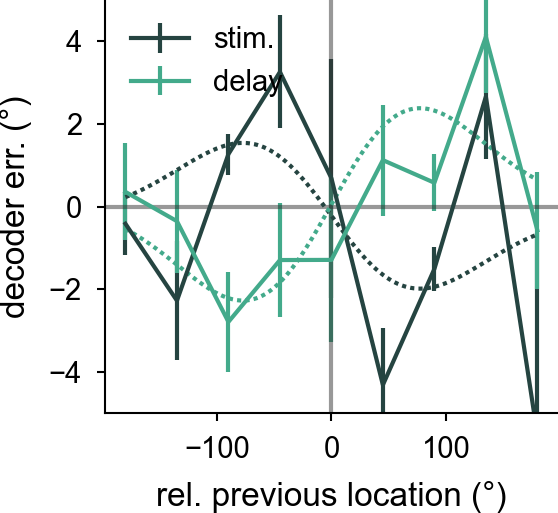

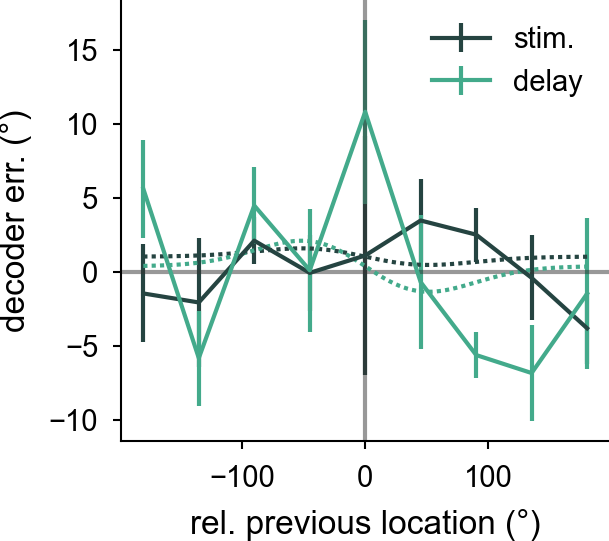

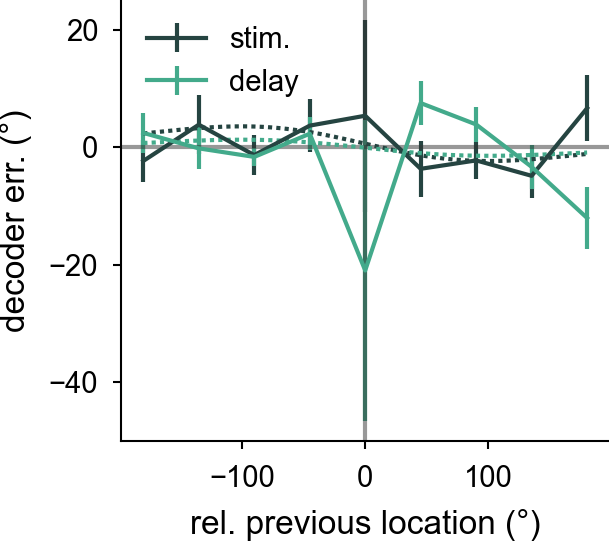

In [10]:
# decoder error of delay_n+1 to target_n+1
folded=False

for m,monkey in enumerate(monkeys):#enumerate(['Sa', 'Wa']):#
    borders_mono=[]
    df_mono = df.loc[(df.monkey==monkey)].copy().reset_index(drop=True)
    df_mono['sign_prevcurr'] = sign_rl(df_mono.prev_curr.values)
    if folded==True:
        df_mono['prev_curr'] = np.abs(df_mono.prev_curr)
    prevcurr = np.unique(df.loc[df.session_continuous=='Sa0'].prev_curr)#np.unique(df_mono.prev_curr)#np.unique(df_mono.loc[df_mono.session==0].prev_curr)#np.unique(df_mono.prev_curr)    max_num_delaysteps = np.min((np.array([df_mono.borders_full.values[i][16]-df_mono.borders_full.values[i][15]\

    # shape: (sessions x delay groups x prev-curr differences) 
    decodersd = np.empty((len(np.unique(df_mono.session)), 2, len(prevcurr)))*np.nan
    mono_prederr = {'early':np.empty((len(df_mono)))*np.nan, 'late':np.empty((len(df_mono)))*np.nan}
    # compute SD for sessions separately
    for session_id,session in enumerate(np.unique(df_mono.session)):#
        df_sess = df_mono.loc[(df_mono.session==session)].copy()
        borders_full = df_sess.borders_full.values[0]
        d_start = borders_full[14]+1
        d_end = borders_full[18]-2
        
        # start of delay
        prederr = [circdist(np.angle(df_sess.pred_complex_curr_combined[i][d_start]),\
                        np.angle(df_sess.shufflepred_complex_curr_combined[i][d_start]))\
                                                                for i in df_sess.index]

        mono_prederr['early'][df_sess.index] = np.squeeze(prederr)
        df_sess['prederr_currdelay_start'] = np.squeeze(prederr)
        
        # end of delay
        prederr = [circdist(np.angle(df_sess.pred_complex_curr_combined[i][d_end]),\
                        np.angle(df_sess.shufflepred_complex_curr_combined[i][d_end]))\
                                                                for i in df_sess.index]
        mono_prederr['late'][df_sess.index] = np.squeeze(prederr)
        df_sess['prederr_currdelay_end'] = np.squeeze(prederr)


        if folded==True: # flip error, rel_loc in case of folded
            df_sess['prederr_currdelay_start'] = df_sess['prederr_currdelay_start'].values*\
                                                    df_sess.sign_prevcurr
            df_sess['prederr_currdelay_end'] = df_sess['prederr_currdelay_end'].values*\
                                                    df_sess.sign_prevcurr

        # get mean PREDICTION error at each relative location for each session, delay split
        for loc_id,loc in enumerate(prevcurr):
            decodersd[session_id, 0, loc_id] = circmean(df_sess.loc[df_sess.prev_curr==loc]['prederr_currdelay_start'],\
                                                       low=-np.pi, high=np.pi)
            decodersd[session_id, 1, loc_id] = circmean(df_sess.loc[df_sess.prev_curr==loc]['prederr_currdelay_end'],\
                                                       low=-np.pi, high=np.pi)
#             plt.hist(df_sess['prederr_currdelay'+str(delay_id)].values, alpha=0.3)
#         plt.show()
    # get session-mean in each relative location (nans per session if the target didn't appear)
    mean = np.nanmean(decodersd, axis=0)
    # TODO change errorbars
    errorbars = 'SEM'
    if errorbars=='SEM':
        std = sem(decodersd, axis=0, nan_policy='omit')
    elif errorbars == "CI":
        std = 2*np.nanstd(decodersd, axis=0)
    # make consecutive colors for diff delays
    label = ['early', 'late']
    xx = np.linspace(-np.pi, np.pi, 1000)
    
    f, ax = plt.subplots(figsize=(2.1,1.95))
    plt.axhline(0, color='#333333', alpha=0.5)
    plt.axvline(0, color='#333333', alpha=0.5)
    plt.errorbar(np.rad2deg(prevcurr), np.rad2deg(mean[0]), yerr=np.rad2deg(std[0]),\
                 color=colors['SerialBiasWeak'], label='stim.')
    plt.errorbar(np.rad2deg(prevcurr), np.rad2deg(mean[1]), yerr=np.rad2deg(std[1]),\
                 color=colors['SerialBias'], label='delay')

    # fit DoG
    df_mono['neural_error'] = mono_prederr[label[0]]
    df_mono['neural_error_late'] = mono_prederr[label[1]]
    para = neural_sigma[monkey]
    df_mono['bias_estimate'] = -hf.dog1(para, df_mono.prev_curr)
    model = smf.ols('neural_error ~ bias_estimate', data=df_mono).fit()
    plt.plot(np.rad2deg(xx), np.rad2deg(model.params['Intercept']+\
            model.params['bias_estimate']*-hf.dog1(para, xx)),\
            color=colors['SerialBiasWeak'], dashes=[1,1])
    model = smf.ols('neural_error_late ~ bias_estimate', data=df_mono).fit()
    plt.plot(np.rad2deg(xx), np.rad2deg(model.params['Intercept']+\
            model.params['bias_estimate']*-hf.dog1(para, xx)),\
            color=colors['SerialBias'], dashes=[1,1])

    plt.xlabel('rel. previous location (°)')
    plt.ylabel('decoder err. (°)')
    plt.legend()
    sns.despine()
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    if monkey=='Sa':
        plt.ylim([-5, 5])
        plt.tight_layout()
        #plt.savefig(DATAPATH+'./Figures/Figure5/INLAYSerialBiasDrift_NeuralFitDoG_'+monkey+'.svg')
    sns.despine()
    plt.show()

        
    

### Fig 5b: neural SD

Computing monkey Sa...
Computing monkey Wa...


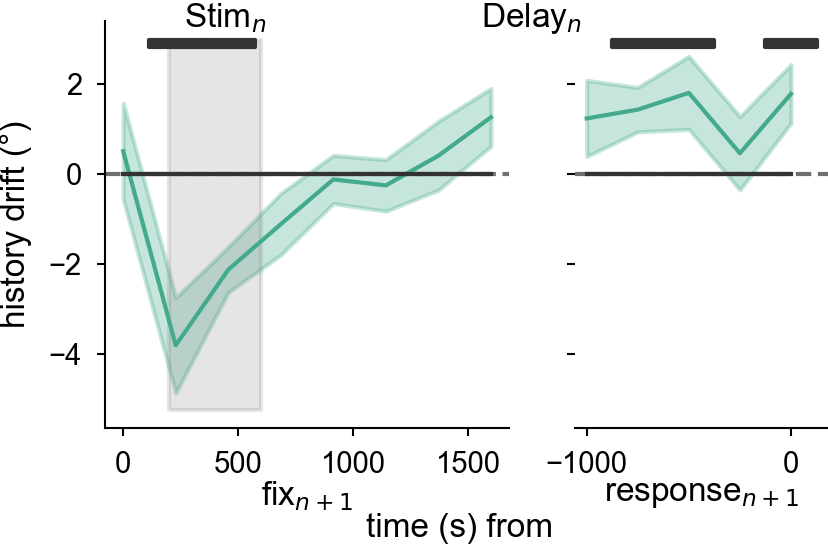

In [11]:
# compute correlations of neuron and behavior
# for each session get a correlation of neurons / behavior separately
sd_all = {m: [] for m in monkeys}
sd_joint = []
borders_all = []
for m,monkey in enumerate(['Sa', 'Wa']):#enumerate(monkeys):#
    print('Computing monkey '+monkey+'...')
    df_mono = df.loc[df.monkey==monkey]

    # compute SD for sessions separately
    for session_id,session in enumerate(np.unique(df_mono.session)):#
        df_sess = df_mono.loc[(df_mono.session==session)].copy().reset_index(drop=True)
        borders_all.append(df_sess.borders_full[0])

        df_sess['bias_estimate'] = -hf.dog1(neural_sigma[monkey], df_sess.prev_curr)
        # compute DECODER SD for different time points in the CURRENT delay
        sd_time=[]
        for delay_id,delay in enumerate(range(len(df_sess.pred_complex_curr_combined[1]))):
            # get average prediction error in defined timesteps
            df_sess['prederr_delaystep'] = circdist([np.angle(df_sess.pred_complex_curr_combined[i][delay])\
                                          for i in df_sess.index],\
                               [np.angle(df_sess.shufflepred_complex_curr_combined[i][delay])\
                                for i in df_sess.index])

            # fit model
            model = smf.ols('prederr_delaystep ~ bias_estimate', data=df_sess).fit()

            #save parameter of model
            sd_time.append(np.rad2deg(model.params['bias_estimate']))
        sd_joint.append(sd_time)
        sd_all[monkey].append(sd_time)


# cut sessions to same length

sd_cut,borders_mean = cut_task_timings(sd_joint, borders_all, 19)
# only look at 2nd trial's delay
sd_trial2 = sd_cut[:, borders_mean[11]:]

plot_twolines_full(R=sd_trial2,base=np.zeros((sd_trial2.shape)), bins=bins,\
                  labelR='',labelB='', errorbars='SEM', end_border=6,shorten_delay = 2, currentTrial=True,\
                         borders=borders_mean, ylabel='history drift (°)', colors=[colors['SerialBias'], '#333333'])
plt.tight_layout()
#plt.savefig('./Figures/Figure5/SerialBiasDelayDrift_SaWa_200ms.svg')
plt.show()


### Supplement: Correlate behavioral SD vs neural SD

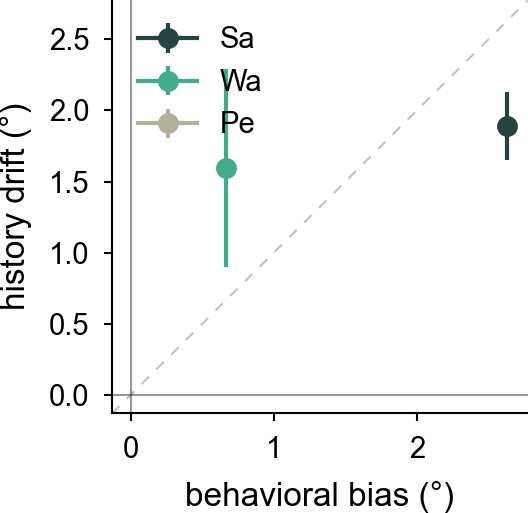

In [12]:
from sklearn.model_selection import KFold

# decoder error of delay_n+1 to target_n+1
folded=False

# define delay timesteps
delay_steps = int(600/bins)# size of each delay step

colors_SD = ['#254441ff', '#43aa8bff', '#b2b09bff']

all_behavfits=[]
all_neuralfits=[]
f, ax = plt.subplots(figsize=(2.,1.95))
ax.axhline(0, color='#333333', alpha=0.5, lw=0.5)
ax.axvline(0, color='#333333', alpha=0.5, lw=0.5)
for m,monkey in enumerate(['Sa', 'Wa', 'Pe']):#enumerate(['Pe','Sa', 'Wa']):#
    borders_mono=[]
    df_mono = df.loc[(df.monkey==monkey)].copy().reset_index(drop=True)
    df_mono['sign_prevcurr'] = sign_rl(df_mono.prev_curr.values)
    if folded==True:
        df_mono['prev_curr'] = np.abs(df_mono.prev_curr)
    prevcurr = np.unique(df_mono.loc[df_mono.session==0].prev_curr)#np.unique(df_mono.prev_curr)    max_num_delaysteps = np.min((np.array([df_mono.borders_full.values[i][16]-df_mono.borders_full.values[i][15]\

    
    # SD FITS ARE OPTIMIZED DIFFERENTLY FOR NEURAL, BEHAV. SD
    df_mono['behav_error_curr_deg'] = np.rad2deg(df_mono.behav_error_curr)
    df_mono['behav_bias_estimate'] = -hf.dog1(sigma[monkey], df_mono.prev_curr)#sign_rl(df_sess.prev_curr.values)#
    df_mono['neural_bias_estimate'] = -hf.dog1(neural_sigma[monkey], df_mono.prev_curr)#sign_rl(df_sess.prev_curr.values)#

    
    mono_prederr = np.empty((len(df_mono)))*np.nan
    # compute SD for sessions separately
    for session_id,session in enumerate(np.unique(df_mono.session)):#
        df_sess = df_mono.loc[(df_mono.session==session)].copy()
        
        borders_full = df_sess.borders_full.values[0]
        d_end = range(borders_full[17]-1, borders_full[17])
        d_end = borders_full[17]-1
        
        mono_prederr[df_sess.index] = np.squeeze([circdist(np.angle(df_sess.pred_complex_curr_combined[i][d_end]),\
                                                         np.angle(df_sess.shufflepred_complex_curr_combined[i][d_end]))\
                                                for i in df_sess.index])
    df_mono['prederr'] = mono_prederr
        
    ################ FIT SERIAL DEPENDENCE ##########################
    kf = KFold(n_splits=5, shuffle=True)
    behavfits=[]
    neuralfits=[]
    for k, (train_idx, test_idx) in enumerate(kf.split(df_mono.index)):
        df_split = df_mono.loc[train_idx]
    
        # fit BEHAVIORAL model
        #behavmodel = smf.mixedlm('behav_error_curr_deg ~ behav_bias_estimate', data=df_mono, groups=df_mono['session']).fit()
        behavmodel = smf.ols('behav_error_curr_deg ~ behav_bias_estimate', data=df_split).fit()
        behavfits.append(behavmodel.params[1])

        # fit NEURAL model# fit BEHAVIORAL model
        df_split['prederr_end_deg'] = np.rad2deg(df_split['prederr'])
        neuralmodel = smf.ols('prederr_end_deg ~ neural_bias_estimate', data=df_split).fit()
        #if (behavmodel.pvalues[1]<0.05) & (neuralmodel.pvalues[1]<0.05):
        behavfits.append(behavmodel.params[1])
        neuralfits.append(neuralmodel.params[1])
    all_behavfits.append(behavfits)
    all_neuralfits.append(neuralfits)

    ax.errorbar(np.mean(all_behavfits[m]), np.mean(all_neuralfits[m]),\
                xerr= sem(all_behavfits[m]),yerr=2*sem(all_neuralfits[m]), color=colors_SD[m], marker='o',\
                label=monkey, markersize=4)
    ax.set_xlabel('behavioral bias (°)')
    ax.set_ylabel('history drift (°)')

x0, x1 = ax.get_xlim()
ax.set_xlim([x0, x1])
ax.set_ylim([x0, x1])

y0, y1 = ax.get_ylim()
ax.plot([y0, y1], [y0, y1], color='#333333', alpha=0.3, dashes=[5,5], lw=0.5)

ax.legend()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()
plt.tight_layout()
#plt.savefig('./Figures/Supplement/NeuralBehavSerialBias_compareMonkeys.svg', dpi=300)
plt.show()

        
    

---

# Reactivation drift

In [13]:
# get reactivation location / strength for each hemisphere
Rtime = [range(df.borders_full[i][13], df.borders_full[i][14]+1) for i in df.index]
df['react'] = [np.angle(np.mean(df['pred_complex_delay_combined'][i][Rtime[i]]))\
                        for i in df.index]
df['react_left'] = [np.angle(np.mean(df['pred_complex_delay_left'][i][Rtime[i]]))\
                        for i in df.index]
df['react_right'] = [np.angle(np.mean(df['pred_complex_delay_right'][i][Rtime[i]]))\
                        for i in df.index]
df['react_strength'] = [np.abs(np.mean(df['pred_complex_delay_combined'][i][Rtime[i]]))\
                        for i in df.index]
df['react_strength_left'] = [np.abs(np.mean(df['pred_complex_delay_left'][i][Rtime[i]]))\
                        for i in df.index]
df['react_strength_right'] = [np.abs(np.mean(df['pred_complex_delay_right'][i][Rtime[i]]))\
                        for i in df.index]


# get delay angle, shuffle for each hemisphere
DELAYEND = [range(df.borders_full[trial][16], df.borders_full[trial][17])\
            for trial in df.index]
df['delayAvg'] =  [np.angle(np.mean(df.pred_complex_curr_combined[trial][DELAYEND[trial]]))\
                               for trial in df.index]
df['delayAvg_shuffle'] = [np.angle(np.mean(df.shufflepred_complex_curr_combined[trial][DELAYEND[trial]]))\
                               for trial in df.index]
df['delayAvg_left'] =  [np.angle(np.mean(df.pred_complex_curr_left[trial][DELAYEND[trial]]))\
                               for trial in df.index]
df['delayAvg_shuffle_left'] = [np.angle(np.mean(df.shufflepred_complex_curr_left[trial][DELAYEND[trial]]))\
                               for trial in df.index]
df['delayAvg_right'] = [np.angle(np.mean(df.pred_complex_curr_right[trial][DELAYEND[trial]]))\
                               for trial in df.index]
df['delayAvg_shuffle_right'] = [np.angle(np.mean(df.shufflepred_complex_curr_right[trial][DELAYEND[trial]]))\
                               for trial in df.index]


### Fig 5c: Reactivation strength and precision

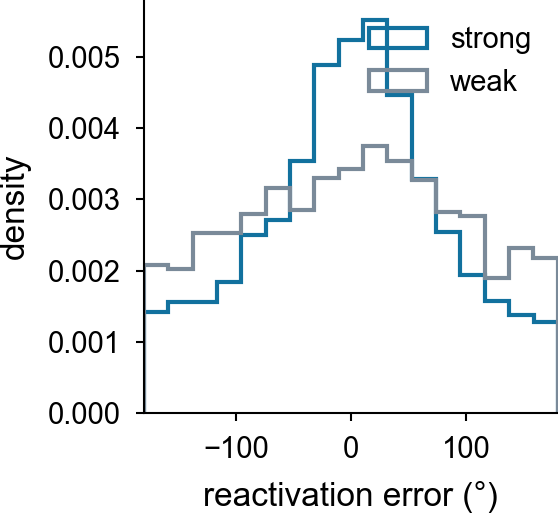

In [15]:
df_mono = df.loc[df.monkey=='Sa'].copy().reset_index(drop=True)

# compute reactivation error (distance to previous target)
df_mono['react_error'] = circdist(df_mono['react'].values, np.round(np.angle(df_mono.targ_prev_xy), 3))

# determine cut-off for each hemisphere, session
perc = 20
df_mono[['cut']] = df_mono.groupby('session_continuous') \
                                ['react_strength'].transform(lambda x: np.percentile(x, perc))
df_high = df_mono.loc[df_mono.react_strength > df_mono.cut]
df_low = df_mono.loc[df_mono.react_strength <= df_mono.cut]

f,ax = plt.subplots(figsize=(2.1,1.95))
ax.hist(np.rad2deg(df_high['react_error'].values), label='strong',\
        bins=17, density=True, histtype='step', color= colors['Reactivation'], linewidth= 1)
ax.hist(np.rad2deg(df_low['react_error'].values), label='weak',\
        bins=17, density=True, histtype='step', color=colors['ReactivationWeak'], linewidth= 1)
ax.legend()
ax.set_xlim([-180, 180])
ax.set_xlabel('reactivation error (°)')
ax.set_ylabel('density')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()
plt.tight_layout()
#plt.savefig('./Figures/Figure5/ReactivationAngleHist_Sa.svg', dpi=300)
plt.show()

### Fig 5d: Within vs across attraction to reactivation

Computing monkey Sa...
Computing monkey Wa...


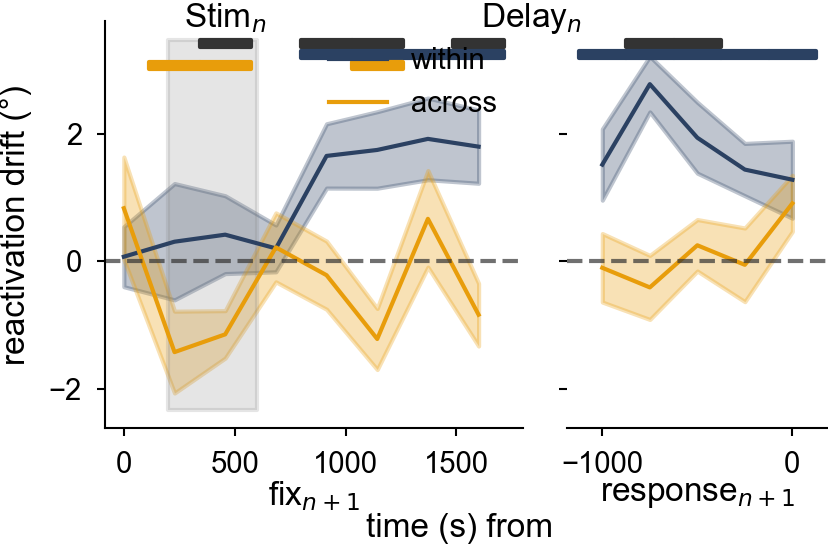

In [16]:
# compute correlations of neuron and behavior
# for each session get a correlation of neurons / behavior separately
hemispheres = np.array(['left', 'right'])
react_all = {'within':[], 'across':[]}
react_term = {m: {side: [] for side in ['within', 'across']} for m in monkeys}
borders_mono={m:[] for m in monkeys}
borders_all=[]
for m,monkey in enumerate(['Sa', 'Wa']):#enumerate(['Sa', 'Wa']):#enumerate(['Sa', 'Wa']):#
    print('Computing monkey '+monkey+'...')
    df_mono = df.loc[df.monkey==monkey]
    for session_id,session in enumerate(np.unique(df_mono.session)):#
        df_sess = df_mono.loc[(df_mono.session==session)].copy().reset_index(drop=True)
        borders_all.append(df_sess.borders_full[0])
        borders_mono[monkey].append(df_sess.borders_full[0])
        
        # get relative distance: reactivation - current target
        reactivationprevcurr_left = circdist(df_sess.react_left, np.angle(df_sess.targ_curr_xy))
        df_sess['bias_left'] = -hf.dog1(reactivation_sigma[monkey],\
                                                  reactivationprevcurr_left)
        reactivationprevcurr_right = circdist(df_sess.react_right, np.angle(df_sess.targ_curr_xy))
        df_sess['bias_right'] = -hf.dog1(reactivation_sigma[monkey],\
                                                  reactivationprevcurr_right)
        
        # subtract shuffle from delay error for all times
        df_sess['pred_shufflesub_left'] = [circdist(np.angle(df_sess['pred_complex_curr_left'][i]),\
                                                    np.angle(df_sess.shufflepred_complex_curr_left[i]))\
                                           for i in df_sess.index]
        df_sess['pred_shufflesub_right'] = [circdist(np.angle(df_sess['pred_complex_curr_right'][i]),\
                                                    np.angle(df_sess.shufflepred_complex_curr_right[i]))\
                                           for i in df_sess.index]

        for s, same in enumerate(['within', 'across']):
            sess_estimates=[]
            # get estimates for each time step
            for delay_id,delay in enumerate(range(len(df_sess.pred_complex_curr_combined[1]))):
                bias_estimate = []
                prederr_delaystep=[]
                timeon=time.time()
                for R,RSide in enumerate(hemispheres): 
                    DSide = RSide if same == 'within' else hemispheres[hemispheres != RSide][0]

                    bias_estimate.append(df_sess['bias_'+RSide])
                    prederr_delaystep.append([df_sess['pred_shufflesub_'+DSide][i][delay]\
                                             for i in df_sess.index])
                    #prederr_delaystep.append(np.squeeze([circdist(np.angle(df_sess['pred_complex_curr_'+DSide][i][delay]),\
                    #                                np.angle(df_sess.targ_curr_xy[i]))\
                    #                       for i in df_sess.index]))
                    
                # fit model on combined areas react/delay err
                df_model = pd.DataFrame({'bias_estimate': np.concatenate(bias_estimate),
                                        'prederr_delaystep_deg': np.rad2deg(np.concatenate(prederr_delaystep))})
                assert len(df_model) == 2*len(df_sess), "Using both left and right predictions needs to double trials (e.g. within = left-left, right-right)"

                # fit model
                model = smf.ols('prederr_delaystep_deg ~ bias_estimate', data=df_model).fit()

                sess_estimates.append(model.params['bias_estimate'])

            react_all[same].append(sess_estimates)
            react_term[monkey][same].append(sess_estimates)

# cut sessions to same length
react_within_cut,borders_mean = cut_task_timings(react_all['within'], borders_all, 19)
react_across_cut,borders_mean = cut_task_timings(react_all['across'], borders_all, 19)
# only look at 2nd trial's delay

react_within_trial2 = react_within_cut[:, borders_mean[11]:]
react_across_trial2 = react_across_cut[:, borders_mean[11]:]

plot_twolines_full(R=react_within_trial2,base=react_across_trial2, bins=bins, currentTrial=True,\
                  labelR='within',labelB='across', errorbars='SEM', end_border=6,shorten_delay = 2,\
                         borders=borders_mean, ylabel='reactivation drift (°)',\
                  significances = True)
plt.tight_layout()
#plt.savefig('./Figures/Figure5/ReactivationBiasWithinAcross_SaWa_200ms.svg')
plt.show()


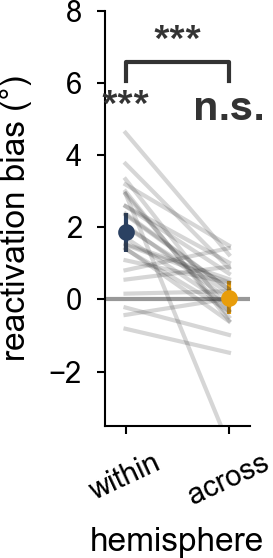

Within: Ttest_1sampResult(statistic=6.861401923375113, pvalue=4.2683335775433675e-07)
Across: Ttest_1sampResult(statistic=0.21087449239153436, pvalue=0.8347654417955803)
Within-Across: Ttest_relResult(statistic=5.545190469014106, pvalue=1.0528146814382262e-05)


In [17]:
react_within_cut,borders_mean = cut_task_timings(react_all['within'], borders_all, 19)
react_across_cut,borders_mean = cut_task_timings(react_all['across'], borders_all, 19)

within_delayavg = np.mean(react_within_cut[:, borders_mean[16]:borders_mean[17]], axis=1)
across_delayavg = np.mean(react_across_cut[:, borders_mean[16]:borders_mean[17]], axis=1)

# plot
f, ax = plt.subplots(figsize=(1.1,2.1))
plt.axhline(0, color='#333333', alpha=0.5)
#within
ax.plot([np.zeros((len(within_delayavg))), np.ones((len(across_delayavg)))],\
        [within_delayavg, across_delayavg], color='#333333', alpha=0.2)
ax.errorbar(0, np.mean(within_delayavg), yerr= 2*sem(within_delayavg), color=colors['Within'], marker='o')

# across
ax.errorbar(1, np.mean(across_delayavg), yerr= 2*sem(across_delayavg), color=colors['Across'], marker='o')
ax.set_xticks([0,1])
ax.set_xticklabels(['within', 'across'], rotation=25)
ax.set_ylabel('reactivation bias (°)')
ax.set_xlabel('hemisphere')

# pvalues
stats_w = ['***' if ttest_1samp(within_delayavg, 0)[1] < 0.005\
           else '**' if ttest_1samp(within_delayavg, 0)[1] < 0.01\
            else '*' if ttest_1samp(within_delayavg, 0)[1] < 0.05 else 'n.s.'][0]
stats_a = ['***' if ttest_1samp(across_delayavg, 0)[1] < 0.005\
           else '**' if ttest_1samp(across_delayavg, 0)[1] < 0.01\
            else '*' if ttest_1samp(across_delayavg, 0)[1] < 0.05 else 'n.s.'][0]
stats_diff = ['***' if ttest_rel(within_delayavg, across_delayavg)[1] < 0.005\
           else '**' if ttest_rel(within_delayavg, across_delayavg)[1] < 0.01\
            else '*' if ttest_rel(within_delayavg, across_delayavg)[1] < 0.05 else 'n.s.'][0]

y0, y1 = ax.get_ylim()
ax.annotate(stats_w,(0, y1-0.3), ha='center', va='bottom', fontsize=10, weight='bold', color='#333333')
ax.annotate(stats_a,(1, y1-0.3), ha='center', va='bottom', fontsize=10, weight='bold', color='#333333')
ax.plot([0,0,1,1],\
        [y1+2*y1/10,y1+3*y1/10, y1+3*y1/10, y1+2*y1/10], linewidth=1, color='#333333')
ax.annotate(stats_diff,\
           (0.5, y1+3*y1/10), ha='center', va='bottom', fontsize=10, weight='bold', color='#333333')
ax.set_xlim([-.2,1.2])
ax.set_ylim([-3.5,8])
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()
plt.tight_layout()
#plt.savefig(DATAPATH+'/Figures/Supplement/Quantify_ReactivationBiasWithinAcross_SaWa_200ms.svg')
plt.show()

print('Within: '+str(ttest_1samp(within_delayavg, 0)))
print('Across: '+str(ttest_1samp(across_delayavg, 0)))
print('Within-Across: '+str(ttest_rel(within_delayavg, across_delayavg)))

### Supplement: Split by percentage of dual trials

Cut-off: 30%...


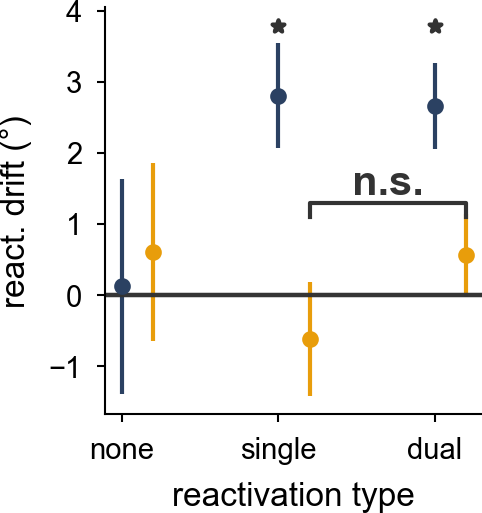

In [18]:
df_helper = df.copy().reset_index(drop=True)
colors_wa = {'within': 'darkgreen', 'across':'darkorange'}
hemispheres = np.array(['left', 'right'])

percent = 30
print('Cut-off: '+str(percent)+'%...')
# determine cut-off for each session
df_helper[['cut_left', 'cut_right']] = df_helper.groupby('session_continuous') \
                                                    [['react_strength_left', 'react_strength_right']] \
                                                    .transform(lambda x: np.percentile(x, percent))
    
# mark reactivations as weak, strong
df_helper['R_strong_left'] = df_helper.react_strength_left > df_helper.cut_left
df_helper['R_strong_right'] = df_helper.react_strength_right > df_helper.cut_right

# assign reactivation types
chosen_trials = {'none': df_helper[(~df_helper.R_strong_left) & (~df_helper.R_strong_right)],\
                     'single': df_helper[((df_helper.R_strong_left) & (~df_helper.R_strong_right)) |\
                                            ((~df_helper.R_strong_left) & (df_helper.R_strong_right))],\
                     'dual': df_helper[(df_helper.R_strong_left) & (df_helper.R_strong_right)]}
['within', 'across']
sd_monkeys = {'within':[],'across':[]}
sd_term = {key:{'within': np.empty((len(np.unique(df_helper.session_continuous))))*np.nan,\
                'across': np.empty((len(np.unique(df_helper.session_continuous))))*np.nan}\
          for key in chosen_trials.keys()}
pid=-1
f,ax = plt.subplots(figsize=(1.85,1.95), sharey=True)
for x, react_combi in enumerate(chosen_trials.keys()):
    df_type = chosen_trials[react_combi]
    sides=[]
    for s, same in enumerate(['within', 'across']):
        for session_id,session in enumerate(df_type.session_continuous.unique()):#
            df_sess = df_type.loc[(df_type.session_continuous==session)].copy()
            monkey = df_sess.monkey.unique()[0]
            
            sess_estimates, reactivationprev_curr, delayerr = [], [], []
            # for each hemisphere
            for R,RSide in enumerate(hemispheres): 
                # use either same hemisphere during delay (within) or opposite (across)
                DSide = RSide if same == 'within' else hemispheres[hemispheres != RSide][0]

                reactivations = df_sess['react_'+RSide].values
                delay = df_sess['delayAvg_'+DSide].values
                shuffledelay = df_sess['delayAvg_shuffle_'+DSide].values# np.angle(df_sess.targ_curr_xy)
                # RELATIVE LOCATION OF PREVIOUS REACTIVATION TO CURRENT TARGET
                if (react_combi == 'single'): # if single, only view attraction to reactivated side
                    df_react_side = df_sess.loc[df_sess['R_strong_'+RSide]]
                    reactivationprev_curr.append(circdist(df_react_side['react_'+RSide].values,\
                                                          np.angle(df_react_side.targ_curr_xy)))
                    
                    delay_react_side = df_react_side['delayAvg_'+DSide].values
                    shuffle_react_side = df_react_side['delayAvg_shuffle_'+DSide].values
                    delayerr.append(circdist(delay_react_side, shuffle_react_side))
                else:
                    reactivationprev_curr.append(circdist(reactivations, np.angle(df_sess.targ_curr_xy)))
                    delayerr.append(circdist(delay, shuffledelay))

            # combine left right in each condition
            reactivationprev_curr = np.concatenate(reactivationprev_curr)
            delayerr = np.concatenate(delayerr)

            # MODEL HOW THE DELAY ACTIVITY IS ATTRACTED TO THE PREVIOUS REACTIVATION LOCATION
            bias_estimate = -hf.dog1(reactivation_sigma[monkey], reactivationprev_curr)#sign_rl(reactivationprev_curr)#

            # Prepare DataFrame for model fitting
            df_model = pd.DataFrame({'bias_estimate': bias_estimate,
                                    'prederr_delaystep_deg': np.rad2deg(delayerr)})
            # fit model
            model = smf.ols('prederr_delaystep_deg ~ bias_estimate', data=df_model).fit()

            #save parameter of model
            sd_term[react_combi][same][session_id] = model.params['bias_estimate']
            sess_estimates.append(model.params['bias_estimate'])
        sd_monkeys[same].append(sess_estimates)


        # get session-mean in each relative location (nans per session if the target didn't appear)

        sd_timing = sd_term[react_combi][same]
        mean, CI = np.nanmean(sd_timing, axis=0), sem(sd_timing, axis=0, nan_policy='omit')

        ax.errorbar(x+s*0.2, mean, yerr=CI, color=colors[same.title()], marker='o', label=same)
        #if (react_combi=='none'):
        #    plt.legend()
        ax.axhline(0, color='#333333', alpha=0.5)

# pvalues of each condition against 0
y0, y1 = ax.get_ylim()
for x, react_combi in enumerate(chosen_trials.keys()):
    for s, same in enumerate(['within', 'across']):
        test_0 = ttest_1samp(sd_term[react_combi][same], 0)[1]
        if test_0 < 0.05:
            plt.scatter(x+s*0.2, y1, marker='*', color='#333333')
# pvalues of single vs dual across condition (n.s.)
ttest_across = ttest_rel(sd_term['single']['across'], sd_term['dual']['across'])[1]
stats_a = ['***' if ttest_across < 0.005\
           else '**' if ttest_across < 0.01\
            else '*' if ttest_across < 0.05 else 'n.s.'][0]
ax.plot([1.2,1.2,2.2,2.2],\
        [1.1,1.3, 1.3, 1.1], linewidth=1, color='#333333')
ax.annotate(stats_a,\
           (1.7, 1.3), ha='center', va='bottom', fontsize=10, weight='bold', color='#333333')

plt.xticks([0,1,2], chosen_trials.keys())#, rotation=25
plt.xlabel('reactivation type')
plt.ylabel('react. drift (°)')
sns.despine()
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.tight_layout()
#plt.savefig('./Figures/Supplement/ReactivationBiasSplitByType_'+str(percent)+'%.svg')
plt.show()


In [19]:
ttest_rel(sd_term['single']['across'], sd_term['dual']['across'])

Ttest_relResult(statistic=-1.1897383043856429, pvalue=0.24134192649963823)

In [20]:
print('Across-0 statistics:')
for x, react_combi in enumerate(chosen_trials.keys()):
    print(react_combi +': ' + str(ttest_1samp(sd_term[react_combi]['across'], 0)))
    
print('Within-0 statistics:')
for x, react_combi in enumerate(chosen_trials.keys()):
    print(react_combi +': ' + str(ttest_1samp(sd_term[react_combi]['within'], 0)))
    
print('Within-across statistics:')
for x, react_combi in enumerate(chosen_trials.keys()):
    print(react_combi +': ' + str(ttest_rel(sd_term[react_combi]['within'], sd_term[react_combi]['across'])))

Across-0 statistics:
none: Ttest_1sampResult(statistic=0.48877079706994986, pvalue=0.6277413553811425)
single: Ttest_1sampResult(statistic=-0.7723080795180811, pvalue=0.4445871656329564)
dual: Ttest_1sampResult(statistic=0.9585607872652853, pvalue=0.3436851279344332)
Within-0 statistics:
none: Ttest_1sampResult(statistic=0.08237917874965907, pvalue=0.9347665512444002)
single: Ttest_1sampResult(statistic=3.8220876844482485, pvalue=0.00046432183974702654)
dual: Ttest_1sampResult(statistic=4.368956904074459, pvalue=8.9507830073635e-05)
Within-across statistics:
none: Ttest_relResult(statistic=-0.23789948672143083, pvalue=0.8132045203570439)
single: Ttest_relResult(statistic=3.4373582734605406, pvalue=0.0014102423573068498)
dual: Ttest_relResult(statistic=2.2807046399136803, pvalue=0.028111023995074518)


### Fig 5e: GMM - Single or Dual Reactivations

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# get reactivation strengths
Rtimes = [range(df.borders_full.values[trial][13], df.borders_full.values[trial][14]+1)\
          for trial in df.index]
# REACTIVATION
# get reactivations: predict PREV target during current fixation time (Rtimes)
df['react_strength_left'] = [np.abs(np.mean(df.pred_complex_delay_left[trial][Rtimes[trial]]))\
                                      for trial in df.index]
df['react_strength_right'] = [np.abs(np.mean(df.pred_complex_delay_right[trial][Rtimes[trial]]))\
                                      for trial in df.index]
df['react_angle_left'] = [np.angle(np.mean(df.pred_complex_delay_left[trial][Rtimes[trial]]))\
                                      for trial in df.index]
df['react_angle_right'] = [np.angle(np.mean(df.pred_complex_delay_right[trial][Rtimes[trial]]))\
                                      for trial in df.index]

# create vector of left, right react strength per trial
X = np.array([df.react_strength_left.values, df.react_strength_right.values]).T

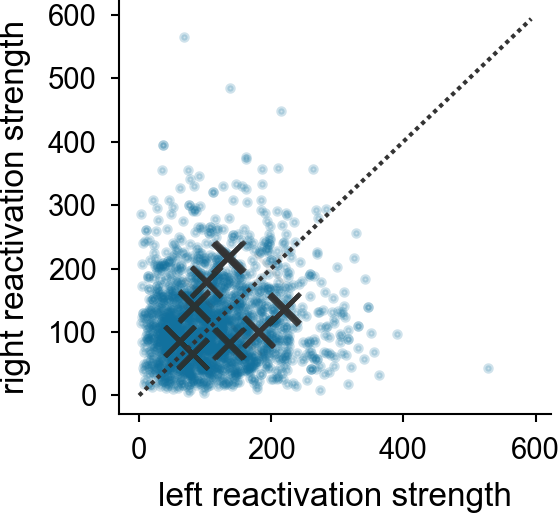

In [22]:
# use four components, expect: None, single-left, single-right, Dual
chosen_components = 4

# get left, right reactivation strengths
df_mono = df.copy().reset_index(drop=True)


# only plot random subsample of datapoints to get smaller svg file
randomIDs = np.random.choice(range(len(X)), 2000)

# figure
f,ax=plt.subplots(figsize=(2.1,1.95))
X_subsample = X[randomIDs]
ax.scatter(X_subsample[:,0], X_subsample[:,1], alpha=0.2, color=colors['Reactivation'], marker='.')
# fit 250 GMMs on full data with differnt start points to check stability 
gm = GaussianMixture(n_components=chosen_components)
for i in range(100): # repeat for random starting points
    gm = GaussianMixture(n_components=chosen_components, covariance_type='full', max_iter=500).fit(X)#, covariance_type='spherical'
    # highlight the found classes
    # highlight the found classes
    dual_class = np.argmax(np.sum(gm.means_, axis=1))
    for m_id,m in enumerate(gm.means_):
        #if m_id == dual_class : 
        #    ax.scatter(m[0], m[1], color='r', marker='x', s=50, alpha=0.1)
        #else:
        ax.scatter(m[0], m[1], color='#333333', marker='x', s=50, alpha=0.1)
# plot diagonal for showing dual reactivation line
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.plot(np.linspace(0,np.max([x1, y1]),10), np.linspace(0,np.max([x1, y1]),10),color='#333333', dashes=[1,1])
ax.set_xlabel('left reactivation strength')
ax.set_ylabel('right reactivation strength')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()
plt.tight_layout()
#plt.savefig('/Figures/Figure5/GMM4FitsSingleVSDualReact.svg')
plt.show()

### Supplement: Illustration of cut-off

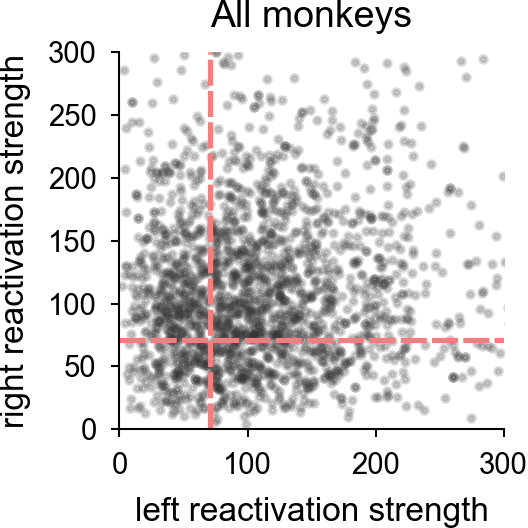

In [23]:
percentile = 30
cut_off = np.percentile(X, percentile)

f,ax=plt.subplots(figsize=(2.,2))
plt.scatter(X_subsample[:,0], X_subsample[:,1], color='#333333', alpha=0.2, marker='.')
plt.axhline(cut_off, lw=1.25, dashes=[5,1], color='lightcoral')
plt.axvline(cut_off, lw=1.25, dashes=[5,1], color='lightcoral')
ax.set_xlabel('left reactivation strength')
ax.set_ylabel('right reactivation strength')
plt.xlim([0, 300])
plt.ylim([0, 300])
plt.title('All monkeys')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
sns.despine()
plt.tight_layout()
#plt.savefig('./Figures/Supplement/Illustration_cutOff.svg')

### Figure 5f: Delay GMM

In [24]:
# get delay strengths
Dtimes = [range(df.borders_full.values[trial][5], df.borders_full.values[trial][6])\
          for trial in df.index]
# REACTIVATION
# get reactivations: predict PREV target during current fixation time (Rtimes)
df['delay_strength_left'] = [np.abs(np.mean(df.pred_complex_delay_left[trial][Dtimes[trial]]))\
                                      for trial in df.index]
df['delay_strength_right'] = [np.abs(np.mean(df.pred_complex_delay_right[trial][Dtimes[trial]]))\
                                      for trial in df.index]
df['delay_strength_combined'] = [np.abs(np.mean(df.pred_complex_delay_combined[trial][Dtimes[trial]]))\
                                      for trial in df.index]

X_delay = np.array([df.delay_strength_left.values, df.delay_strength_right.values]).T

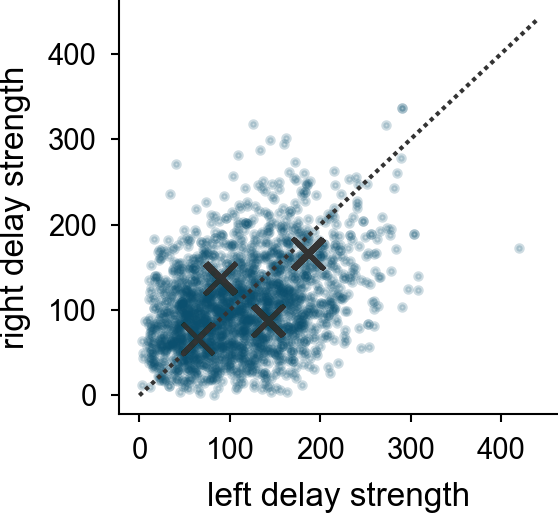

In [26]:
# use four components, expect: None, single-left, single-right, Dual
chosen_components = 4

# get left, right reactivation strengths
df_mono = df.copy().reset_index(drop=True)

# only plot random subsample of datapoints to get smaller svg file
randomIDs = np.random.choice(range(len(X_delay)), 2000)

# figure
f,ax=plt.subplots(figsize=(2.1,1.95))

X_subsample = X_delay[randomIDs]
ax.scatter(X_subsample[:,0], X_subsample[:,1], alpha=0.2, color='#0B506F', marker='.')
# fit 250 GMMs on full data with differnt start points to check stability 
gm = GaussianMixture(n_components=chosen_components)
for i in range(250): # repeat for random starting points
    gm = GaussianMixture(n_components=chosen_components, covariance_type='full', max_iter=500).fit(X_delay)#, covariance_type='spherical'
    # highlight the found classes
    dual_class = np.argmax(np.sum(gm.means_, axis=1))
    for m_id,m in enumerate(gm.means_):
        #if m_id == dual_class : 
        #    ax.scatter(m[0], m[1], color='r', marker='x', s=50, alpha=0.1)
        #else:
        ax.scatter(m[0], m[1], color='#333333', marker='x', s=50, alpha=0.1)
# plot diagonal for showing dual reactivation line
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.plot(np.linspace(0,np.max([x1, y1]),10), np.linspace(0,np.max([x1, y1]),10),color='#333333', dashes=[1,1])
ax.set_xlabel('left delay strength')
ax.set_ylabel('right delay strength')
sns.despine()
plt.tight_layout()
#plt.savefig('./Figures/Figure5/GMM4FitsSingleVSDualReact_DELAY.svg')
plt.show()